In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from random import *


In [35]:
data_train = pd.read_csv('./data/fashion-mnist_train.csv', header = 0)
data_train.head()
# print(data_train.shape)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# thay đổi shape của labels bằng reshape
# 60000 giá trị từ 0-9
# tensorflow yêu cầu labels là 1 vector 2 chiều
# labels = data_train['label'].values.reshape(1, 60000)
# tập train có 60000 ảnh 28x28=784 pixels
train = data_train.drop('label', axis=1)
# print(labels.shape)

# đưa giá trị pixels về 0-1 bằng cách chia cho 255 để giảm độ lớn của giá trị
train = np.array(train / 255.0)
print(train.shape)

(60000, 784)


In [37]:
from sklearn.model_selection import  train_test_split

In [74]:
X = train
# 28x28 reshape thành 28x28x1
X = X.reshape(-1, 28, 28)
labels = data_train['label']
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
y = labels_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)
# print(X)

(48000, 28, 28) (6000, 28, 28) (6000, 28, 28)
(48000, 10) (6000, 10) (6000, 10)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

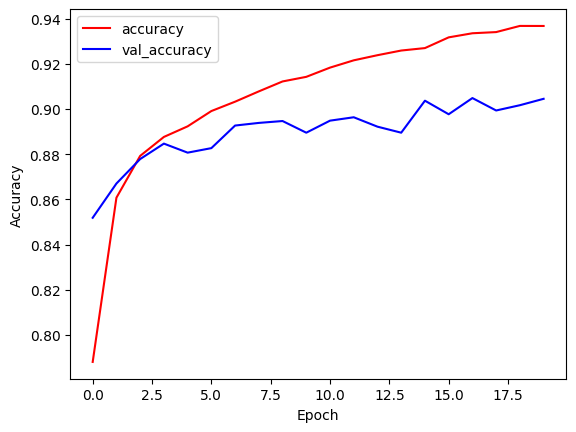

In [72]:
# model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
model.save('./model_keras.h5')

plt.plot(model.history.history['accuracy'], label='accuracy', color='red')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# accuracy_score
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

model = load_model('./model_keras.h5')
yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis=1)
y_test = np.argmax(y_test, axis=1)
# print actual and predicted values
print(pd.DataFrame({'Actual': y_test, 'Predicted': yhat}))
print('Accuracy: ',accuracy_score(y_test, yhat))

188/188 [==============================] - 1s 2ms/step
      Actual  Predicted
0          4          4
1          0          0
2          8          8
3          0          0
4          3          3
...      ...        ...
5995       2          6
5996       3          3
5997       8          8
5998       3          3
5999       8          8

[6000 rows x 2 columns]
Accuracy:  0.9086666666666666
